# **Food Detection using MobileNet V1** 

**Implementation of MobileNet V1 Using Tensorflow** 

*Importing Libraries*

```
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline
```

 




**Model**

`mobile = tf.keras.applications.mobilenet.MobileNet()`



**Preprocessing Image**

```
def prepare_image(file):
    img_path = 'data/MobileNet-samples/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)
```



# **Now Importing Food detection Model MobileNet V1 from Tensorflow Hub**

**Overview**


> This model is trained to recognize 2023 food dishes from images.

**Input**


> This model takes images as input.


*   Inputs are expected to be 3-channel RGB color images of size 224 x 224, scaled to [0, 1]. 

**Output**



> This model outputs to image_classifier.


*   image_classifier: A probability vector of dimension 2024, corresponding to a background class and one of 2023 food dishes in the labelmap.







In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import files
 
 
labelmap = files.upload()

Saving labelmap.csv to labelmap.csv


In [3]:
import pandas as pd

df = pd.read_csv('/content/labelmap.csv')

df

,id,name
0,0,__background__
1,1,Chaudin
2,2,Bambalouni
3,3,Ghoriba
4,4,Mango sticky rice
...,...,...
2019,2019,Thong yip
2020,2020,Zuppa toscana
2021,2021,Dhindo
2022,2022,Thiakry


In [4]:
import tensorflow.compat.v2 as tf
import tensorflow_hub as hub

m = hub.KerasLayer('https://tfhub.dev/google/aiy/vision/classifier/food_V1/1')

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Saving sjfkjhok.jpg to sjfkjhok.jpg
Prediction:  Pepperoni


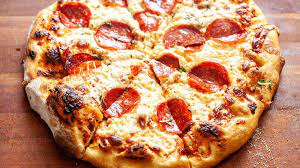

In [7]:
import numpy as np
import pandas as pd
import cv2
from skimage import io
from google.colab import files
from IPython.display import Image

uploaded = files.upload()
filename = next(iter(uploaded))
test_image = filename
input_shape = (224, 224)
labelmap_url = "https://www.gstatic.com/aihub/tfhub/labelmaps/aiy_food_V1_labelmap.csv"

image = np.asarray(io.imread(test_image), dtype="float")
image = cv2.resize(image, dsize=input_shape, interpolation=cv2.INTER_CUBIC)
# Scale values to [0, 1].
image = image / image.max()
# The model expects an input of (?, 224, 224, 3).
images = np.expand_dims(image, 0)
# This assumes you're using TF2.
output = m(images)
predicted_index = output.numpy().argmax()
classes = list(pd.read_csv(labelmap_url)["name"])
print("Prediction: ", classes[predicted_index])
Image(filename)